In [1]:
!pip install -r requirements.txt

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier

# Import Data

In [131]:
# Car data
car_df = pd.read_csv('./data/car_data.csv')

# Breast Cancer data 
cancer_df = pd.read_csv('./data/breast-cancer-wisconsin_data.csv')

# Wine quality data
wine_df = pd.read_csv('./data/winequality-white.csv', sep=';')

print("---------------------------- Car Evaluation Data --------------------------------------")
print(car_df.head())

print("---------------------------- Breast Cancer Data ---------------------------------------")
print(cancer_df.head())

print("---------------------------- Wine Quality Data -----------------------------------------")
print(wine_df.head())

---------------------------- Car Evaluation Data --------------------------------------
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
---------------------------- Breast Cancer Data ---------------------------------------
   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                       

In [132]:
print(car_df.shape)
print(cancer_df.shape)
print(wine_df.shape)

(1728, 7)
(699, 11)
(4898, 12)


In [133]:
print("---------------------------- Car Evaluation Data --------------------------------------")
print(car_df['class'].value_counts(normalize=True))

print("---------------------------- Breast Cancer Data ---------------------------------------")
print(cancer_df['Class'].value_counts(normalize=True))

print("---------------------------- Wine Quality Data -----------------------------------------")
print(wine_df['quality'].value_counts(normalize=True))

---------------------------- Car Evaluation Data --------------------------------------
unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64
---------------------------- Breast Cancer Data ---------------------------------------
2    0.655222
4    0.344778
Name: Class, dtype: float64
---------------------------- Wine Quality Data -----------------------------------------
6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64


In [134]:
# Data Pre-Processing

scaler = StandardScaler()
def process_car(df):
    #df['class'].map({'unacc': 0, 'acc': 1, 'good': 1, 'vgood': 1})
    df['class'] = np.where(df['class'] == 'unacc', 0, 1)
    df1 = pd.get_dummies(df, columns=['buying','maint','doors','persons','lug_boot','safety'])
    X = df1.drop('class', axis = 1)
    y = df1['class'].values
    return X,y

def process_cancer(df):
    #df['Class'].map({4: 1, 2: 0})
    df['Class'] = np.where(df['Class'] == 2, 0, 1)
    df.drop('Sample code number', axis = 1, inplace = True)
    # Dropping records with missing values of Bare Nuclei and converting it to numeric
    df = df[df['Bare Nuclei'] != '?']
    df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
    X = df.drop('Class', axis = 1)
    y = df.Class.values
    # Features scaling
    scaler.fit(X)
    X = scaler.transform(X)
    return X,y

def process_wine(df):
    df['quality'] = np.where(df['quality'] >= 6, 1, 0)
    X = df.drop('quality', axis = 1)
    y = df.quality.values
    scaler.fit(X)
    X = scaler.transform(X)
    return X,y

car_X, car_y = process_car(car_df)
cancer_X, cancer_y = process_cancer(cancer_df)
wine_X, wine_y = process_wine(wine_df)
#print(wine_X[:5])
#print(car_df.head())

/var/folders/49/s47xmzpx1zsg5t1_3y45j9sm0000gn/T/ipykernel_12012/3543779592.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])


In [135]:
len(cancer_X)

683

<AxesSubplot:>

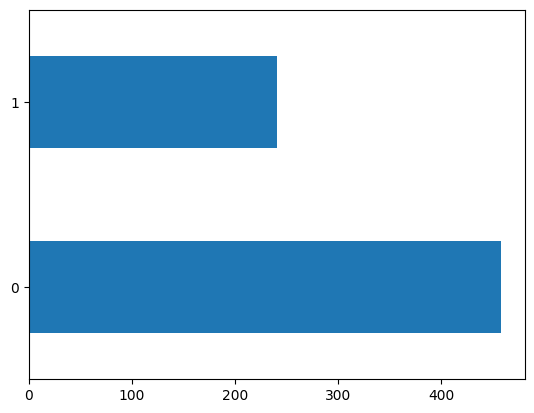

In [136]:
cancer_df['Class'].value_counts().plot(kind='barh')

# Cancer Dataset Analysis

In [137]:
X_train, X_test, y_train, y_test = train_test_split(cancer_X, cancer_y, test_size = 0.2, random_state = 5)

# Decision Tree

In [138]:
dt_clf = tree.DecisionTreeClassifier(random_state = 1)
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
print("Baseline Accuracy score", accuracy_score(y_test,y_pred))
print("Baseline Recall", recall_score(y_test,y_pred))
print("Baseline Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Baseline F1 score", f1_score(y_test, y_pred))

Baseline Accuracy score 0.948905109489051
Baseline Recall 0.8936170212765957
Baseline Balanced Accuracy score 0.9356973995271867
Baseline F1 score 0.9230769230769231


In [139]:
# On cross validation data
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=dt_clf, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Baseline Accuracy score", results['test_accuracy'].mean())
print("Baseline Recall score", results['test_recall'].mean())
print("Baseline Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Baseline F1 score", results['test_f1'].mean())

Baseline Accuracy score 0.9285904920767306
Baseline Recall score 0.8645074224021592
Baseline Balanced Accuracy score 0.9138834898731119
Baseline F1 score 0.8946406949108088


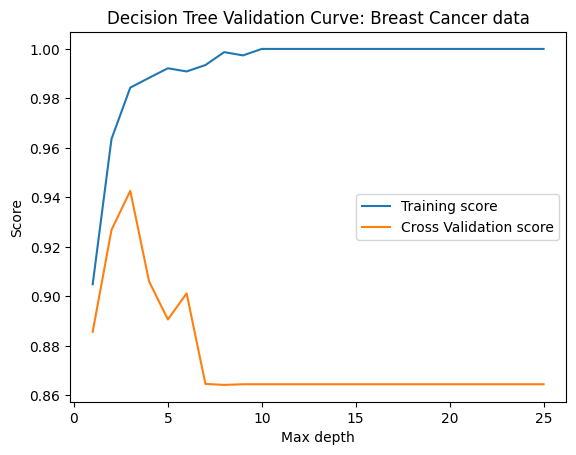

In [140]:
# Validation Curve
depth_trees = np.arange(1, 26, 1)

train_scores, cv_scores = validation_curve(dt_clf, X_train, y_train, 
                                           param_name="max_depth", param_range=depth_trees, scoring = 'recall',cv=5, n_jobs=4)
plt.figure()
plt.plot(depth_trees, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(depth_trees, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Decision Tree Validation Curve: Breast Cancer data')
plt.xlabel('Max depth')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/DT_VC_depth_cancer.png')
plt.show()
# Best depth: 3

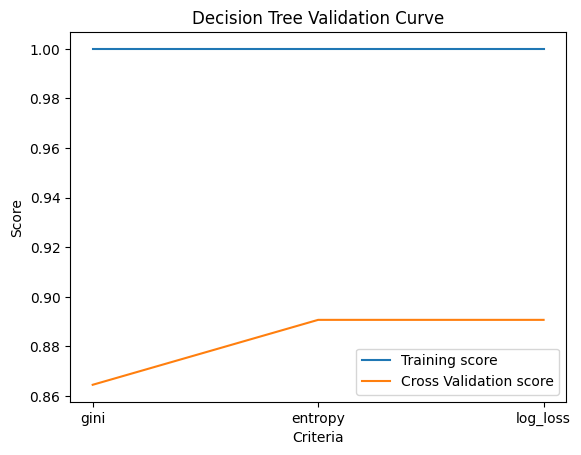

In [141]:
depth_trees = np.arange(1, 26, 1)
criteria_params = ["gini","entropy","log_loss"]
train_scores, cv_scores = validation_curve(dt_clf, X_train, y_train, 
                                           param_name="criterion", param_range=criteria_params, scoring = 'recall',cv=5, n_jobs=4)
plt.figure()
plt.plot(criteria_params, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(criteria_params, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Decision Tree Validation Curve')
plt.xlabel('Criteria')
plt.ylabel('Score')
plt.legend()
plt.show()

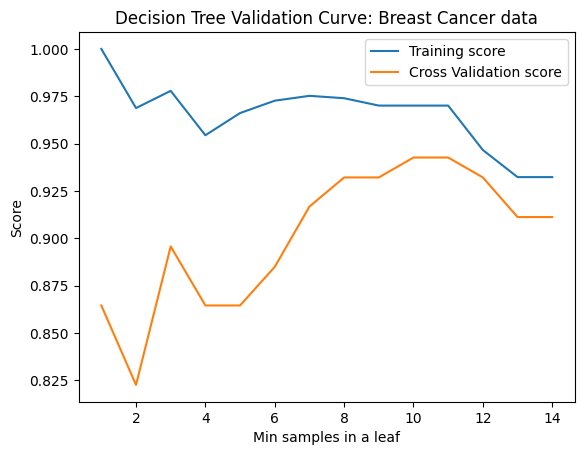

In [142]:
samples_val = np.arange(1, 15, 1)

train_scores, cv_scores = validation_curve(dt_clf, X_train, y_train, 
                                           param_name="min_samples_leaf", param_range=samples_val, scoring = 'recall',cv=5, n_jobs=4)
plt.figure()
plt.plot(samples_val, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(samples_val, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Decision Tree Validation Curve: Breast Cancer data')
plt.xlabel('Min samples in a leaf')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/DT_VC_leaf_cancer.png')
plt.show()

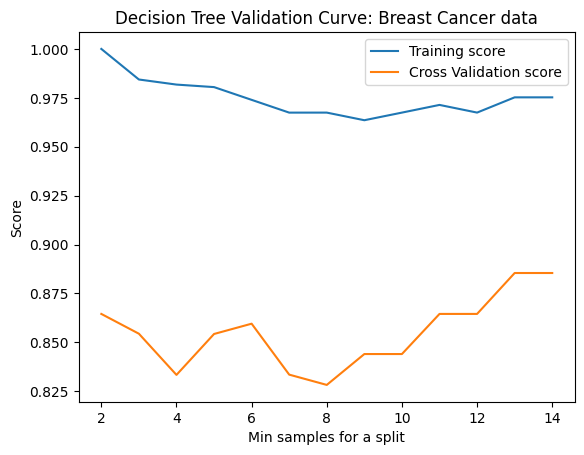

In [143]:
samples_val = np.arange(2, 15, 1)

train_scores, cv_scores = validation_curve(dt_clf, X_train, y_train, 
                                           param_name="min_samples_split", param_range=samples_val,scoring = 'recall', cv=5, n_jobs=4)
plt.figure()
plt.plot(samples_val, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(samples_val, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Decision Tree Validation Curve: Breast Cancer data')
plt.xlabel('Min samples for a split')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/DT_VC_split_cancer.png')
plt.show()

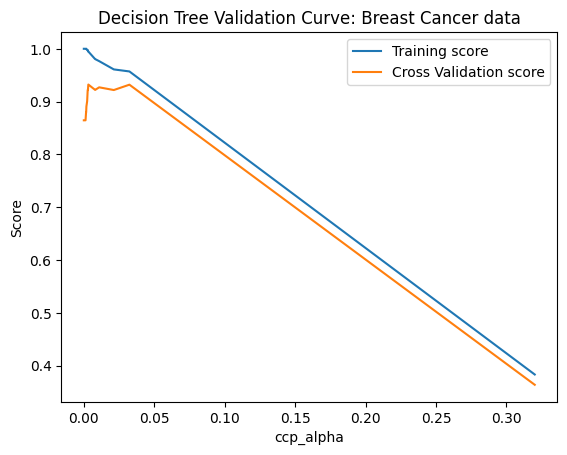

In [144]:
# Citation: https://www.analyticsvidhya.com/blog/2020/10/cost-complexity-pruning-decision-trees/
path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']
# Best alpha: 0.001256


train_scores, cv_scores = validation_curve(dt_clf, X_train, y_train, 
                                           param_name="ccp_alpha", param_range=alphas, scoring = 'recall',cv=5, n_jobs=4)
plt.figure()
plt.plot(alphas, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(alphas, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Decision Tree Validation Curve: Breast Cancer data')
plt.xlabel('ccp_alpha')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/DT_VC_alpha_cancer.png')
plt.show()

In [145]:
# Hyperparameters tuning using GridSearch CV
depth_trees = np.arange(1, 11, 1)
criteria_params = ["gini","entropy","log_loss"]
#criteria_params = ["gini"]
leaf_samples_val = np.arange(1, 11, 1)
split_samples_val = np.arange(2, 15, 1)
#split_samples_val = [2]
ccp_list = [0.01,0.02,0.03,0.04,0.05]

params_gridsearch = {'max_depth': depth_trees, 'criterion': criteria_params, 
                     'min_samples_leaf': leaf_samples_val,'min_samples_split': split_samples_val,
                     'ccp_alpha': ccp_list}

dt_clf_gs = GridSearchCV(tree.DecisionTreeClassifier(random_state = 7), param_grid = params_gridsearch, 
                         scoring = 'recall',cv = 5, n_jobs=4)
init_time = time.time()
dt_clf_gs.fit(X_train, y_train)
print("Grid Search took {} seconds ".format(time.time() - init_time))
best_params = dt_clf_gs.best_params_
print("Best parameters: ", best_params)



Grid Search took 28.862093210220337 seconds 
Best parameters:  {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [146]:
best_dt = tree.DecisionTreeClassifier(random_state = 3, max_depth = 3, ccp_alpha = 0.01,
                                      min_samples_leaf = 1, min_samples_split = 2, criterion = 'entropy')
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=best_dt, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Tuned Model Accuracy score", results['test_accuracy'].mean())
print("Tuned Recall score", results['test_recall'].mean())
print("Tuned Model Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Tuned Model F1 score", results['test_f1'].mean())

Tuned Model Accuracy score 0.9414678899082569
Tuned Recall score 0.9531713900134952
Tuned Model Balanced Accuracy score 0.9440303630147959
Tuned Model F1 score 0.9212486031176403


In [147]:
print("Tuned Model Test Results")
y_pred = dt_clf_gs.predict(X_test)
print("Tuned Model Accuracy score", accuracy_score(y_test,y_pred))
print("Tuned Model Recall score", recall_score(y_test,y_pred))
print("Tuned Model Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Tuned Model F1 score", f1_score(y_test, y_pred))

Tuned Model Test Results
Tuned Model Accuracy score 0.9416058394160584
Tuned Model Recall score 1.0
Tuned Model Balanced Accuracy score 0.9555555555555555
Tuned Model F1 score 0.9215686274509803


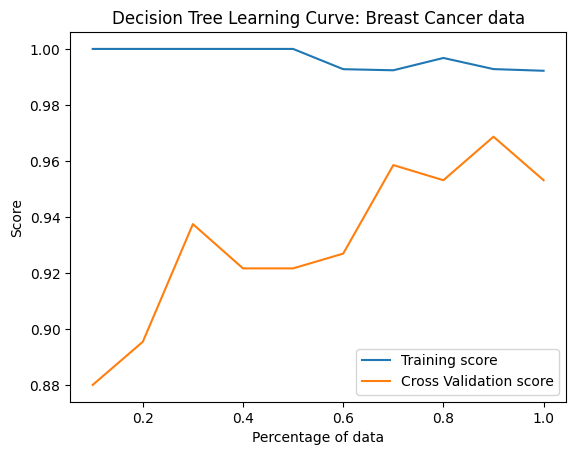

In [150]:
# Learning Curve after tuning. 
best_dt = tree.DecisionTreeClassifier(random_state = 3, max_depth = 3, ccp_alpha = 0.01,
                                      min_samples_leaf = 1, min_samples_split = 2, criterion = 'entropy')
best_dt.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(best_dt, X_train, y_train, train_sizes = train_data_size, scoring = 'recall',cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Decision Tree Learning Curve: Breast Cancer data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/DT_LC_cancer.png')
plt.show()

In [151]:
# Training time 
best_dt = tree.DecisionTreeClassifier(random_state = 3, max_depth = 3, ccp_alpha = 0.01,
                                      min_samples_leaf = 1, min_samples_split = 2, criterion = 'entropy')
init_time = time.time()
best_dt.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = dt_clf.predict(X_test)
print("Query time in seconds:", time.time() - init_time)

Training time in seconds: 0.04608583450317383
Query time in seconds: 0.002629995346069336


In [152]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        93
           1       0.89      0.95      0.92        44

    accuracy                           0.95       137
   macro avg       0.94      0.95      0.94       137
weighted avg       0.95      0.95      0.95       137



# Boosting

In [153]:
dt_stumps = tree.DecisionTreeClassifier(max_depth = 1,random_state = 4)
boosting_clf = AdaBoostClassifier(base_estimator = dt_stumps, random_state = 5)
boosting_clf.fit(X_train, y_train)
y_pred = boosting_clf.predict(X_test)
print("Baseline Accuracy score", accuracy_score(y_test,y_pred))
print("Baseline Recall score", recall_score(y_test,y_pred))
print("Baseline Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Baseline F1 score", f1_score(y_test, y_pred))

Baseline Accuracy score 0.9927007299270073
Baseline Recall score 1.0
Baseline Balanced Accuracy score 0.9944444444444445
Baseline F1 score 0.9894736842105264


In [154]:
# On cross-validation data
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=boosting_clf, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Baseline Accuracy score", results['test_accuracy'].mean())
print("Baseline Recall score", results['test_recall'].mean())
print("Baseline Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Baseline F1 score", results['test_f1'].mean())

Baseline Accuracy score 0.9469224353628023
Baseline Recall score 0.9113360323886639
Baseline Balanced Accuracy score 0.9387263662949357
Baseline F1 score 0.9234412955465586


Validation curve for no of estimators took 3.1647980213165283 seconds 


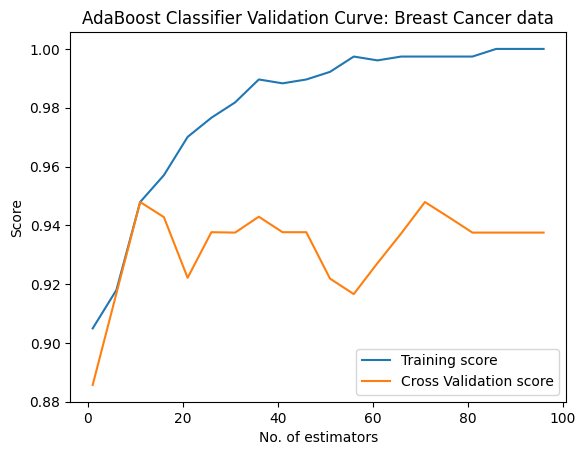

In [155]:
# Validation Curve for no. of weak learners

estimators_vals = np.arange(1, 101, 5)
init_time = time.time()
train_scores, cv_scores = validation_curve(boosting_clf, X_train, y_train, 
                                           param_name="n_estimators", param_range=estimators_vals, scoring='recall',cv=5, n_jobs=4)
print("Validation curve for no of estimators took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(estimators_vals, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(estimators_vals, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('AdaBoost Classifier Validation Curve: Breast Cancer data')
plt.xlabel('No. of estimators')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/AB_VC_estim_cancer.png')
plt.show()



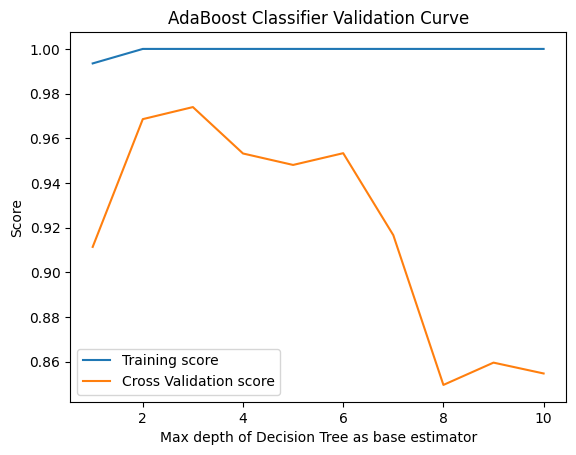

In [156]:
ada_models = []
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
acc_train = []
acc_cv = []
for i in range(1,11):
    dt_stump = tree.DecisionTreeClassifier(max_depth = i)
    boost_i = AdaBoostClassifier(base_estimator = dt_stump)
    ada_models.append(boost_i) 
    results = cross_validate(estimator=boost_i, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
    
    acc_cv.append(results['test_recall'].mean())
    acc_train.append(results['train_recall'].mean())

plt.figure()
plt.plot(np.arange(1,11), acc_train, label = 'Training score')
plt.plot(np.arange(1,11), acc_cv, label = 'Cross Validation score')
plt.title('AdaBoost Classifier Validation Curve')
plt.xlabel('Max depth of Decision Tree as base estimator')
plt.ylabel('Score')
plt.legend()
plt.show()


Validation curve for no of estimators took 1.2055847644805908 seconds 


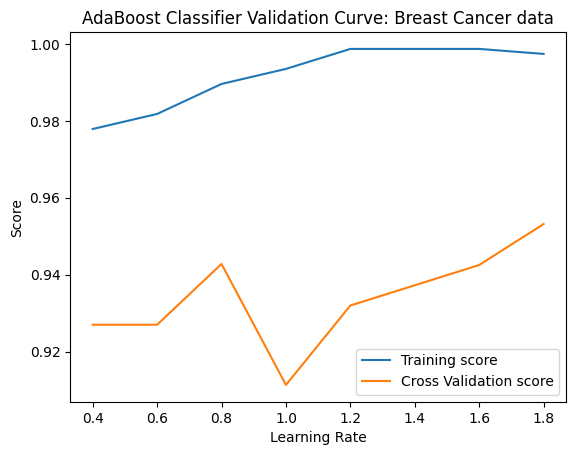

In [157]:
# Validation curve for learning rate
learning_vals = np.arange(0.4, 2, 0.2)
init_time = time.time()
train_scores, cv_scores = validation_curve(boosting_clf, X_train, y_train, 
                                           param_name="learning_rate", param_range=learning_vals, 
                                           scoring='recall',cv=5, n_jobs=4)
print("Validation curve for no of estimators took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(learning_vals, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(learning_vals, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('AdaBoost Classifier Validation Curve: Breast Cancer data')
plt.xlabel('Learning Rate')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/AB_VC_lr_cancer.png')
plt.show()



In [158]:
# Hyperparameters tuning using GridSearch CV
est_params = np.arange(1, 101, 5)
learn_params = np.arange(0.4,1.2,0.2)


params_gridsearch = {"n_estimators": est_params, "learning_rate": learn_params}
dt_stump = tree.DecisionTreeClassifier(max_depth = 2)
ada_gs = GridSearchCV(AdaBoostClassifier(base_estimator = dt_stump, random_state = 9), param_grid = params_gridsearch, 
                      scoring='recall',cv = 5, n_jobs=4)
init_time = time.time()
ada_gs.fit(X_train, y_train)
print("Grid Search took {} seconds ".format(time.time() - init_time))
best_params = ada_gs.best_params_
print("Best parameters: ", best_params)




Grid Search took 4.40643572807312 seconds 
Best parameters:  {'learning_rate': 1.0000000000000002, 'n_estimators': 26}


In [159]:
dt_stump = tree.DecisionTreeClassifier(max_depth = 2)
best_ada = AdaBoostClassifier(random_state = 10, base_estimator = dt_stump, n_estimators = 26, learning_rate = 1.0)
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=best_ada, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Tuned Model Accuracy score", results['test_accuracy'].mean())
print("Tuned Model Recall score", results['test_recall'].mean())
print("Tuned Model Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Tuned Model F1 score", results['test_f1'].mean())

Tuned Model Accuracy score 0.9652210175145954
Tuned Model Recall score 0.9792172739541162
Tuned Model Balanced Accuracy score 0.9684416349649856
Tuned Model F1 score 0.9523057865828951


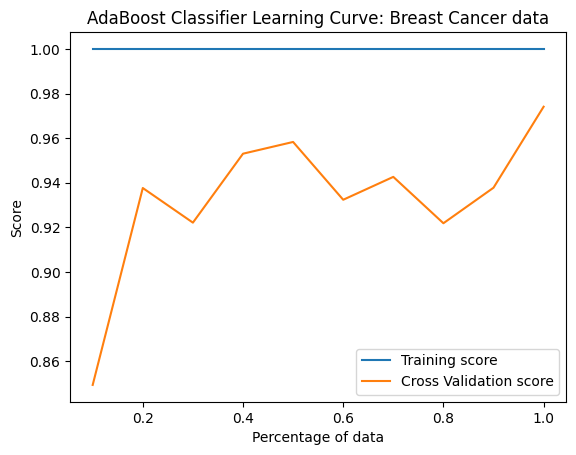

In [160]:
# Learning Curve after tuning. 
dt_stump = tree.DecisionTreeClassifier(max_depth = 2)
best_ada = AdaBoostClassifier(random_state = 10, base_estimator = dt_stump, n_estimators = 26, learning_rate = 1.0)
best_ada.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(best_ada, X_train, y_train, train_sizes = train_data_size, 
                                            scoring='recall',cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('AdaBoost Classifier Learning Curve: Breast Cancer data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/AB_LC_cancer.png')
plt.show()

In [162]:
# Training time 
dt_stump = tree.DecisionTreeClassifier(max_depth = 2)
best_ada = AdaBoostClassifier(random_state = 10, base_estimator = dt_stump, n_estimators = 26, learning_rate = 1.0)
init_time = time.time()
best_ada.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = best_ada.predict(X_test)
print("Query time in seconds:", time.time() - init_time)

Training time in seconds: 0.03644108772277832
Query time in seconds: 0.0026099681854248047


In [163]:
print("Tuned Model Test Results")
y_pred = best_ada.predict(X_test)
print("Tuned Model Accuracy score", accuracy_score(y_test,y_pred))
print("Tuned Model Recall score", recall_score(y_test,y_pred))
print("Tuned Model Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Tuned Model F1 score", f1_score(y_test, y_pred))

Tuned Model Test Results
Tuned Model Accuracy score 0.9854014598540146
Tuned Model Recall score 0.9787234042553191
Tuned Model Balanced Accuracy score 0.983806146572104
Tuned Model F1 score 0.9787234042553191


In [164]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



# KNN

In [168]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)
print("Baseline Accuracy score", accuracy_score(y_test,y_pred))
print("Baseline Model Recall score", recall_score(y_test,y_pred))
print("Baseline Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Baseline F1 score", f1_score(y_test, y_pred))

Baseline Accuracy score 0.9927007299270073
Baseline Model Recall score 1.0
Baseline Balanced Accuracy score 0.9944444444444445
Baseline F1 score 0.9894736842105264


In [169]:
# On cross-validation data
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=knn_clf, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Baseline Accuracy score", results['test_accuracy'].mean())
print("Baseline Recall score", results['test_recall'].mean())
print("Baseline Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Baseline F1 score", results['test_f1'].mean())

Baseline Accuracy score 0.9561134278565472
Baseline Recall score 0.9377867746288799
Baseline Balanced Accuracy score 0.9519517374150436
Baseline F1 score 0.9376757338956055


Validation curve for no of neighbors took 1.4206011295318604 seconds 


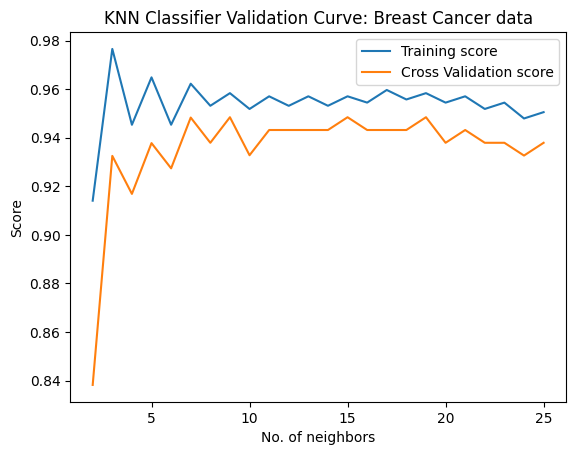

In [170]:
# Validation Curve for no. of neighbors

neigh_vals = np.arange(2, 26, 1)
init_time = time.time()
train_scores, cv_scores = validation_curve(knn_clf, X_train, y_train, 
                                           param_name="n_neighbors", param_range=neigh_vals,scoring='recall', cv=5, n_jobs=4)
print("Validation curve for no of neighbors took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(neigh_vals, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(neigh_vals, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('KNN Classifier Validation Curve: Breast Cancer data')
plt.xlabel('No. of neighbors')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/KNN_VC_neigh_cancer.png')
plt.show()

# No of neighbors should be  7 for good CV score

Validation curve took 0.08490705490112305 seconds 


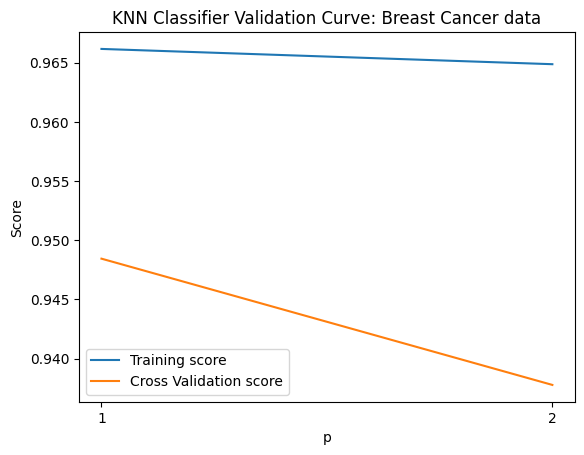

In [171]:
# Validation Curve for p value (1 for Manhattan and 2 for Euclidean)

#leaf_vals = np.arange(10,55,5)
p_vals = [1,2]
p_val_str = ['1','2']
init_time = time.time()
train_scores, cv_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, 
                                           param_name="p", param_range=p_vals,scoring='recall', cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(p_val_str, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(p_val_str, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('KNN Classifier Validation Curve: Breast Cancer data')
plt.xlabel('p')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/KNN_VC_p_cancer.png')
plt.show()

# p as 1 shows good CV score

Validation curve took 1.392805814743042 seconds 


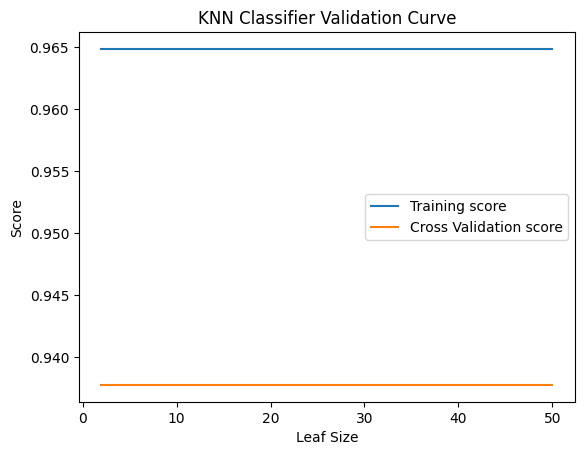

In [172]:
# Validation Curve for leaf_size

leaf_vals = np.arange(2,52,2)
init_time = time.time()
train_scores, cv_scores = validation_curve(KNeighborsClassifier(), X_train, y_train, 
                                           param_name="leaf_size", param_range=leaf_vals, scoring='recall',cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(leaf_vals, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(leaf_vals, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('KNN Classifier Validation Curve')
plt.xlabel('Leaf Size')
plt.ylabel('Score')
plt.legend()
plt.show()


In [173]:
# Hyperparameters tuning using GridSearch CV
neigh_params = np.arange(2, 16, 1)
p_params = [1,2]


params_gridsearch = {"n_neighbors": neigh_params, "p": p_params}

knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid = params_gridsearch, scoring='recall',cv = 5, n_jobs=4)
init_time = time.time()
knn_gs.fit(X_train, y_train)
print("Grid Search took {} seconds ".format(time.time() - init_time))
best_params = knn_gs.best_params_
print("Best parameters: ", best_params)



Grid Search took 0.23453712463378906 seconds 
Best parameters:  {'n_neighbors': 5, 'p': 1}


In [174]:
# On cross-validated data
best_knn = KNeighborsClassifier(n_neighbors = 5, p = 1)
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=best_knn, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Tuned Model Accuracy score", results['test_accuracy'].mean())
print("Tuned Model Recall score", results['test_recall'].mean())
print("Tuned Model Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Tuned Model F1 score", results['test_f1'].mean())

Tuned Model Accuracy score 0.9616013344453711
Tuned Model Recall score 0.9484480431848853
Tuned Model Balanced Accuracy score 0.9586908223972717
Tuned Model F1 score 0.9455807350544193


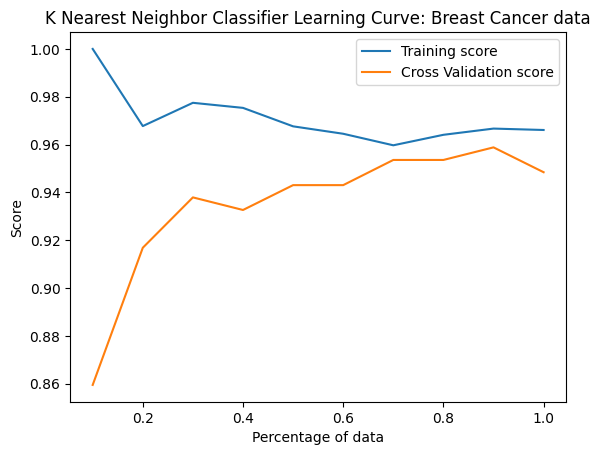

In [175]:
best_knn = KNeighborsClassifier(n_neighbors = 5, p = 1)
best_knn.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(best_knn, X_train, y_train, train_sizes = train_data_size,scoring='recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('K Nearest Neighbor Classifier Learning Curve: Breast Cancer data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/KNN_LC_cancer.png')
plt.show()

In [176]:
# Training time 
best_knn = KNeighborsClassifier(n_neighbors = 5, p = 1)
init_time = time.time()
best_knn.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = best_knn.predict(X_test)
print("Query time in seconds:", time.time() - init_time)

Training time in seconds: 0.003513813018798828
Query time in seconds: 0.007076740264892578


In [177]:
print("Tuned Model Test Results")
y_pred = best_knn.predict(X_test)
print("Tuned Model Accuracy score", accuracy_score(y_test,y_pred))
print("Tuned Model Recall score", recall_score(y_test,y_pred))
print("Tuned Model Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Tuned Model F1 score", f1_score(y_test, y_pred))

Tuned Model Test Results
Tuned Model Accuracy score 1.0
Tuned Model Recall score 1.0
Tuned Model Balanced Accuracy score 1.0
Tuned Model F1 score 1.0


In [178]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00        47

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



# SVM

In [179]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print("Baseline Accuracy score", accuracy_score(y_test,y_pred))
print("Baseline Recall score", recall_score(y_test,y_pred))
print("Baseline Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Baseline F1 score", f1_score(y_test, y_pred))

Baseline Accuracy score 0.9854014598540146
Baseline Recall score 0.9787234042553191
Baseline Balanced Accuracy score 0.983806146572104
Baseline F1 score 0.9787234042553191


In [180]:
# On cross-validation data
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=svm_clf, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Baseline Accuracy score", results['test_accuracy'].mean())
print("Baseline Recall score", results['test_recall'].mean())
print("Baseline Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Baseline F1 score", results['test_f1'].mean())

Baseline Accuracy score 0.9616013344453712
Baseline Recall score 0.9690958164642375
Baseline Balanced Accuracy score 0.9633809062200462
Baseline F1 score 0.946823176823177


Validation curve took 1.5654406547546387 seconds 


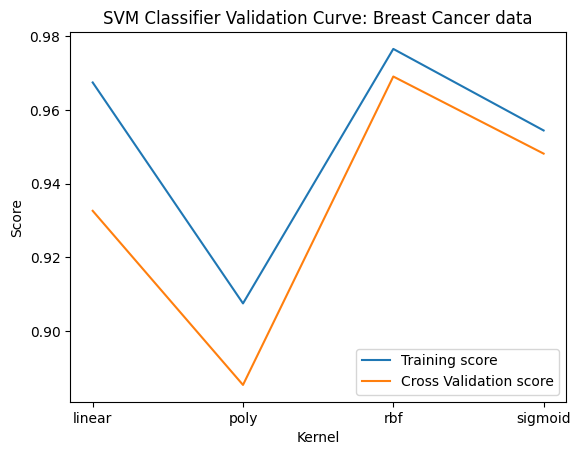

In [181]:
# Validation Curve for kernels

kernel_vals = ['linear', 'poly','rbf', 'sigmoid']
init_time = time.time()
train_scores, cv_scores = validation_curve(svm_clf, X_train, y_train, 
                                           param_name="kernel", param_range=kernel_vals, scoring = 'recall', cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(kernel_vals, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(kernel_vals, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('SVM Classifier Validation Curve: Breast Cancer data')
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/SVM_VC_kernel_cancer.png')
plt.show()



Validation curve took 0.08114504814147949 seconds 


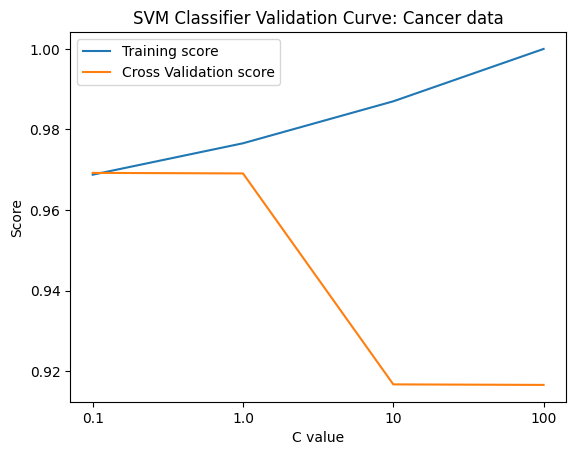

In [183]:
# Validation Curve for C with default (rbf) kernel

#C_vals = [0.1, 0.5, 1, 5, 10, 20, 40, 60, 80,100, 150, 200, 250, 300, 400, 500, 600, 800, 1000]
C_vals = [0.1, 1, 10, 100]
C_vals_str = ['0.1', '1.0', '10', '100']
init_time = time.time()
train_scores, cv_scores = validation_curve(SVC(), X_train, y_train, 
                                           param_name="C", param_range=C_vals, scoring = 'recall',cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(C_vals_str, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(C_vals_str, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('SVM Classifier Validation Curve: Cancer data')
plt.xlabel('C value')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/SVM_VC_C_cancer.png')
plt.show()

Validation curve took 0.1632521152496338 seconds 


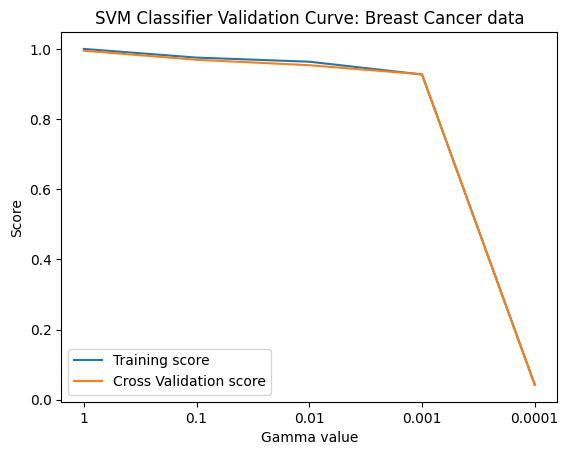

In [185]:
# Validation Curve for gamma with rbf kernel

gamma_vals = [1, 0.1, 0.01, 0.001, 0.0001]
g_val_str = ['1', '0.1', '0.01', '0.001', '0.0001']
init_time = time.time()
train_scores, cv_scores = validation_curve(SVC(kernel = 'rbf'), X_train, y_train, 
                                           param_name="gamma", param_range=gamma_vals,scoring = 'recall', cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(g_val_str, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(g_val_str, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('SVM Classifier Validation Curve: Breast Cancer data')
plt.xlabel('Gamma value')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/SVM_VC_gamma_cancer.png')
plt.show()

Validation curve took 0.16970586776733398 seconds 


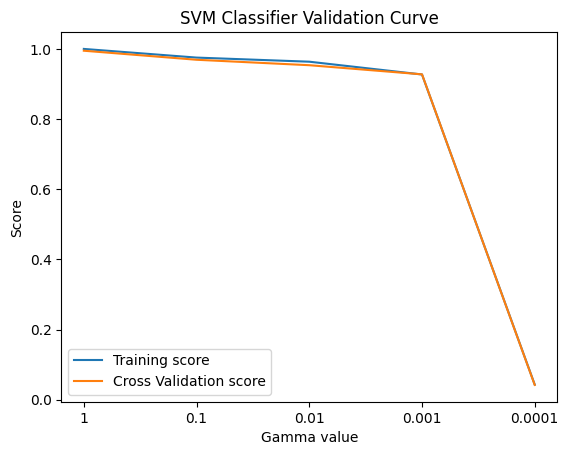

In [69]:
# Validation Curve for gamma with default (rbf) kernel

gamma_vals = [1, 0.1, 0.01, 0.001, 0.0001]
g_val_str = ['1', '0.1', '0.01', '0.001', '0.0001']
init_time = time.time()
train_scores, cv_scores = validation_curve(SVC(), X_train, y_train, 
                                           param_name="gamma", param_range=gamma_vals, scoring = 'recall',cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(g_val_str, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(g_val_str, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('SVM Classifier Validation Curve')
plt.xlabel('Gamma value')
plt.ylabel('Score')
plt.legend()
plt.show()

In [74]:
# Hyperparameters tuning using GridSearch CV
# DO not run this; takes forever
# kernel_vals = ['linear', 'poly','rbf', 'sigmoid']
# C_vals = [0.1, 1, 10, 100]
# gamma_vals = [1, 0.1, 0.01, 0.001, 0.0001]

# params_gridsearch = {"kernel": kernel_vals, "C": C_vals, "gamma": gamma_vals}

# svc_gs = GridSearchCV(SVC(), param_grid = params_gridsearch, scoring='recall',cv = 5, n_jobs=4)
# init_time = time.time()
# svc_gs.fit(X_train, y_train)
# print("Grid Search took {} seconds ".format(time.time() - init_time))
# best_params = svc_gs.best_params_
# print("Best parameters: ", best_params)




Grid Search took 0.5222930908203125 seconds 
Best parameters:  {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [189]:
# On cross-validated data
#best_svc = SVC(kernel = 'rbf', C = 0.1, gamma = 0.01)
best_svc = SVC(kernel = 'rbf', C = 0.1, gamma = 0.01)
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=best_svc, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Tuned Model Accuracy score", results['test_accuracy'].mean())
print("Tuned Model Recall score", results['test_recall'].mean())
print("Tuned Model Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Tuned Model F1 score", results['test_f1'].mean())

Tuned Model Accuracy score 0.9616013344453712
Tuned Model Recall score 0.9326585695006748
Tuned Model Balanced Accuracy score 0.9550415583921884
Tuned Model F1 score 0.9446823063982401


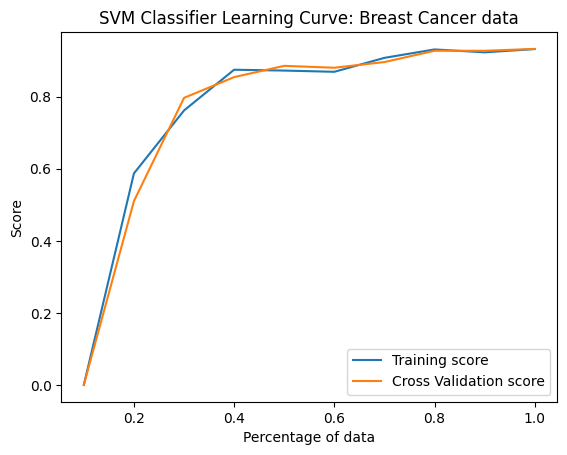

In [191]:
# Learning Curve for SVM
best_svc = SVC(kernel = 'rbf', C = 0.1, gamma = 0.01)
best_svc.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(best_svc, X_train, y_train, train_sizes = train_data_size, scoring='recall',cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('SVM Classifier Learning Curve: Breast Cancer data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/SVM_LC_cancer.png')
plt.show()

In [192]:
# Training & Predicting time 
best_svc = SVC(kernel = 'rbf', C = 0.1, gamma = 0.01)
init_time = time.time()
best_svc.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = best_svc.predict(X_test)
print("Query time in seconds:", time.time() - init_time)

Training time in seconds: 0.015871047973632812
Query time in seconds: 0.004743814468383789


In [193]:
print("Tuned Model Test Results")
y_pred = best_svc.predict(X_test)
print("Tuned Model Accuracy score", accuracy_score(y_test,y_pred))
print("Tuned Model Recall score", recall_score(y_test,y_pred))
print("Tuned Model Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Tuned Model F1 score", f1_score(y_test, y_pred))

Tuned Model Test Results
Tuned Model Accuracy score 0.9854014598540146
Tuned Model Recall score 0.9787234042553191
Tuned Model Balanced Accuracy score 0.983806146572104
Tuned Model F1 score 0.9787234042553191


In [194]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137



# Neural Network

In [195]:
nn_clf = MLPClassifier(random_state = 31, hidden_layer_sizes = (5,2), max_iter = 2000)
nn_clf.fit(X_train, y_train)
y_pred = nn_clf.predict(X_test)
print("Baseline Accuracy score", accuracy_score(y_test,y_pred))
print("Baseline Recall score", recall_score(y_test,y_pred))
print("Baseline Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Baseline F1 score", f1_score(y_test, y_pred))

Baseline Accuracy score 0.9635036496350365
Baseline Recall score 0.9361702127659575
Baseline Balanced Accuracy score 0.9569739952718677
Baseline F1 score 0.9462365591397849


In [196]:
# On cross-validation data
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=nn_clf, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Baseline Accuracy score", results['test_accuracy'].mean())
print("Baseline Accuracy score", results['test_recall'].mean())
print("Baseline Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Baseline F1 score", results['test_f1'].mean())

Baseline Accuracy score 0.9634028356964137
Baseline Accuracy score 0.9584345479082321
Baseline Balanced Accuracy score 0.9622756240547197
Baseline F1 score 0.9487379786850916


Validation curve took 5.941497802734375 seconds 


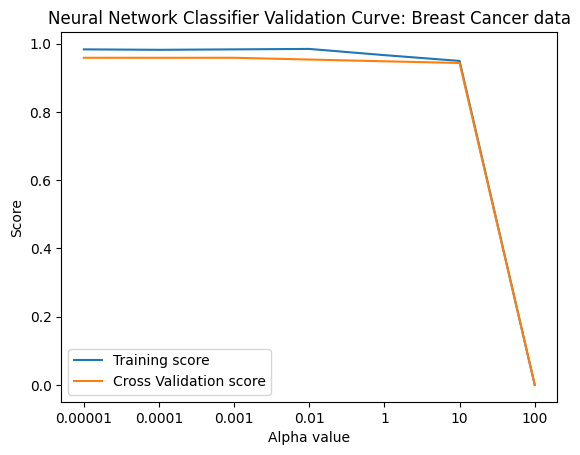

In [197]:
# Validation curve of alpha (Regularization parameter)
alpha_val = [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
alpha_val_str = ['0.00001', '0.0001', '0.001', '0.01', '1', '10','100']
init_time = time.time()
train_scores, cv_scores = validation_curve(nn_clf, X_train, y_train, 
                                           param_name="alpha", param_range=alpha_val, scoring = 'recall',cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(alpha_val_str, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(alpha_val_str, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Validation Curve: Breast Cancer data')
plt.xlabel('Alpha value')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_VC_alpha_cancer.png')
plt.show()

Validation curve took 3.1187760829925537 seconds 


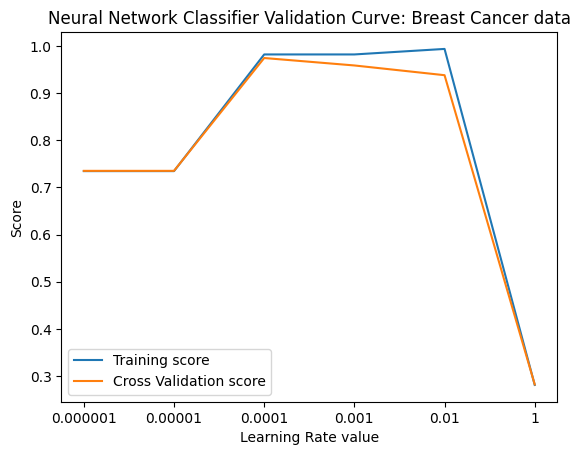

In [198]:
# Validation curve of learning rate
lr_val = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1]
lr_val_str = ['0.000001','0.00001', '0.0001', '0.001', '0.01', '1']
init_time = time.time()
train_scores, cv_scores = validation_curve(nn_clf, X_train, y_train, 
                                           param_name="learning_rate_init", param_range=lr_val,scoring = 'recall', cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(lr_val_str, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(lr_val_str, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Validation Curve: Breast Cancer data')
plt.xlabel('Learning Rate value')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_VC_lr_cancer.png')
plt.show()

Validation curve took 3.868952989578247 seconds 


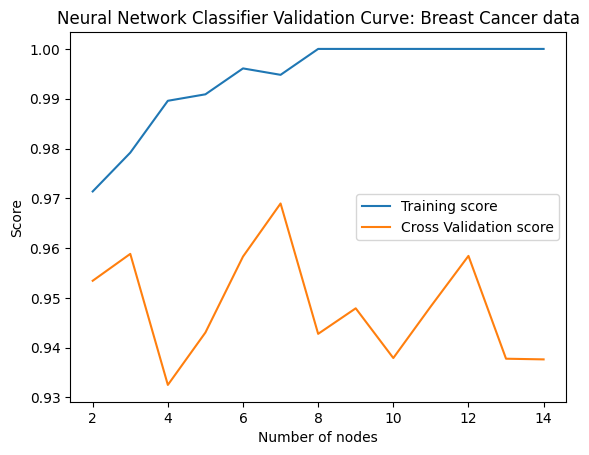

In [199]:
# Validation curve of  hidden layer size
hidd_val = np.arange(2,15,1)
nn_clf = MLPClassifier(random_state = 32, alpha = 0.001, learning_rate_init = 0.01, max_iter = 2000)
init_time = time.time()
hidd_val_s =[(i,) for i in hidd_val]
train_scores, cv_scores = validation_curve(nn_clf, X_train, y_train, 
                                           param_name="hidden_layer_sizes", param_range=hidd_val_s,scoring = 'recall', 
                                           cv=5, n_jobs=4)
print("Validation curve took {} seconds ".format(time.time() - init_time))
plt.figure()
plt.plot(hidd_val, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(hidd_val, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Validation Curve: Breast Cancer data')
plt.xlabel('Number of nodes')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_VC_hidden_cancer.png')
plt.show()

In [200]:
# Hyperparameters tuning using GridSearch CV
alpha_val = [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
lr_val = [0.000001,0.00001, 0.0001, 0.001, 0.01, 1]
hidden_val = np.arange(2,15,1)
nn_clf = MLPClassifier(random_state = 32, max_iter = 2000)

params_gridsearch = {"alpha": alpha_val, "learning_rate_init": lr_val, "hidden_layer_sizes": hidden_val}

knn_gs = GridSearchCV(nn_clf, param_grid = params_gridsearch, scoring = 'recall',cv = 5, n_jobs=4)
init_time = time.time()
knn_gs.fit(X_train, y_train)
print("Grid Search took {} seconds ".format(time.time() - init_time))
best_params = knn_gs.best_params_
print("Best parameters: ", best_params)


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anura

Grid Search took 477.22007298469543 seconds 
Best parameters:  {'alpha': 1e-05, 'hidden_layer_sizes': 4, 'learning_rate_init': 1e-06}


/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/anurag/opt/miniconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


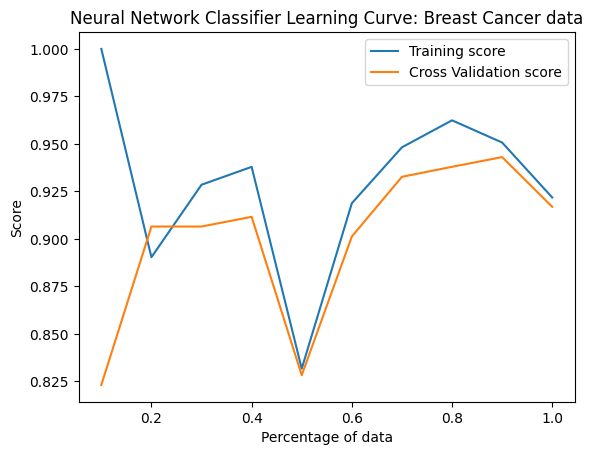

In [209]:
# Learning Curve for NN
best_nn = MLPClassifier(random_state = 33, hidden_layer_sizes = (7,2), max_iter = 2000, alpha = 10, learning_rate_init = 0.01)
best_nn.fit(X_train,y_train)
train_data_size = np.linspace(0.1,1,10)
_, train_scores, cv_scores = learning_curve(best_nn, X_train, y_train, train_sizes = train_data_size,scoring = 'recall', cv = 5, n_jobs = 4)
plt.figure()
plt.plot(train_data_size, np.mean(train_scores, axis = 1), label = 'Training score')
plt.plot(train_data_size, np.mean(cv_scores, axis = 1), label = 'Cross Validation score')
plt.title('Neural Network Classifier Learning Curve: Breast Cancer data')
plt.xlabel('Percentage of data')
plt.ylabel('Score')
plt.legend()
plt.savefig('./plots/NN_LC_cancer.png')
plt.show()

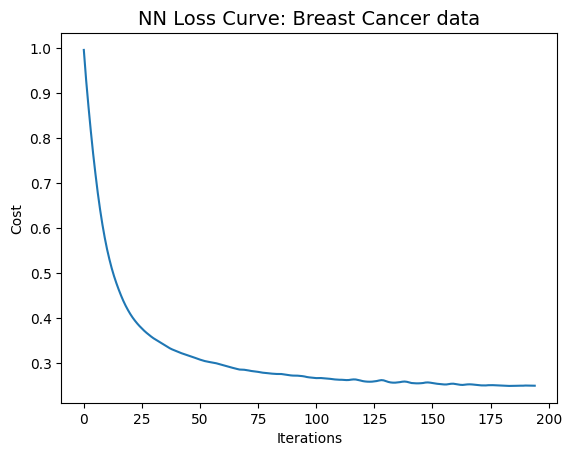

In [210]:
nn_clf1 = MLPClassifier(random_state = 35, hidden_layer_sizes = (7,2), max_iter = 2000, 
                       alpha = 10, learning_rate_init = 0.01, solver = 'adam')
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=56)
nn_clf1.fit(X_train1, y_train1)
plt.plot(nn_clf1.loss_curve_)
plt.title("NN Loss Curve: Breast Cancer data", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.savefig('./plots/NN_Loss_cancer.png')
plt.show()


In [211]:
# On cross-validated data
best_nn = MLPClassifier(random_state = 33, hidden_layer_sizes = (7,2), max_iter = 2000, 
                        alpha = 10, learning_rate_init = 0.01)


# nn_clf1 = MLPClassifier(random_state = 35, hidden_layer_sizes = (4,2), max_iter = 2000, 
#                        alpha = 0.00001, learning_rate_init = 0.000001, solver = 'adam')
req_scores = ['accuracy', 'balanced_accuracy', 'f1', 'precision', 'recall']
results = cross_validate(estimator=best_nn, X = X_train, y = y_train, cv = 5, scoring = req_scores, 
                         return_train_score=True)
results
print("Tuned Model Accuracy score", results['test_accuracy'].mean())
print("Tuned Model Recall score", results['test_recall'].mean())
print("Tuned Model Balanced Accuracy score", results['test_balanced_accuracy'].mean())
print("Tuned Model F1 score", results['test_f1'].mean())

Tuned Model Accuracy score 0.956096747289408
Tuned Model Recall score 0.9171390013495276
Tuned Model Balanced Accuracy score 0.947281774316615
Tuned Model F1 score 0.9357928323087702


In [212]:
# Training & Predicting time 
best_nn = MLPClassifier(random_state = 33, hidden_layer_sizes = (7,2), max_iter = 2000, 
                        alpha = 10, learning_rate_init = 0.01)
init_time = time.time()
best_nn.fit(X_train,y_train)
print("Training time in seconds:", time.time() - init_time)
init_time = time.time()
y_pred = best_nn.predict(X_test)
print("Query time in seconds:", time.time() - init_time)

Training time in seconds: 0.15752291679382324
Query time in seconds: 0.0003669261932373047


In [213]:
print("Tuned Model Test Results")
y_pred = best_nn.predict(X_test)
print("Tuned Model Accuracy score", accuracy_score(y_test,y_pred))
print("Tuned Model Recall score", recall_score(y_test,y_pred))
print("Tuned Model Balanced Accuracy score", balanced_accuracy_score(y_test, y_pred))
print("Tuned Model F1 score", f1_score(y_test, y_pred))

Tuned Model Test Results
Tuned Model Accuracy score 0.9854014598540146
Tuned Model Recall score 0.9787234042553191
Tuned Model Balanced Accuracy score 0.983806146572104
Tuned Model F1 score 0.9787234042553191


In [215]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        47

    accuracy                           0.99       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.99      0.99      0.99       137

